<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Cleaning and Combining Data With pandas

---



## Learning objectives
---
In this lesson, we’ll use pandas to accomplish the following:

- Run through multiple data cleaning processes:
    - Handling NULL values
    - Adding calculated fields using functions 
    - Converting to datetimes
    - Removing duplicate rows
- Combine datasets in multiple ways:
    - Aggregate datasets using `groupby()`
    - Use `concat()` to UNION datasets together
    - Use `merge()` to JOIN datasets together 
- Create insights from data by combining these methods!

## Import pandas
---
First things first, include your imports at the top of your notebook.

In [1]:
import pandas as pd

## Load the data
---

Start by reading in the orders csv file in the datasets folder. We'll use the orders table from Super Store for the first set of tasks - you're already familiar with this dataset from working in SQL, now let's analyze it in Python!

In [2]:
orders= pd.read_csv('Documents/Python_Class_Files/datasets/orders.csv')

In [3]:
pwd

'/Users/jessedeatherage'

### Explore the dataset
---
Start with some exploratory analysis methods to inspect the data. Which of the methods we've learned so far should we always remember to use when working with a new dataset?

In [4]:
#find head
orders.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.3,0.3,NaN,9954.0
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.5,0.5,NaN,4792.0
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.3,0.3,NaN,19848.0
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.5,0.5,NaN,1410.0
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.5,0.5,NaN,1826.0


In [5]:
#descriptive stats
orders.describe()

,sales,quantity,discount,profit,postal_code,region_id
count,999991.000000,999991.000000,999991.000000,999991.000000,192888.000000,999795.000000
mean,245.885888,3.477444,0.247224,1.658624,55348.941095,6370.559013
std,481.540695,2.285502,0.137232,39.977661,32145.458536,10456.510728
min,0.440000,1.000000,0.000000,-6599.980000,1040.000000,38.000000
25%,30.680000,2.000000,0.130000,0.100000,23320.000000,2125.000000
50%,84.780000,3.000000,0.250000,0.200000,57103.000000,3688.000000
75%,250.740000,5.000000,0.350000,0.290000,90049.000000,5636.000000
max,22638.480000,14.000000,0.670000,8399.980000,99301.000000,98923.000000


In [6]:
#info about the dataset
orders.info()
type(orders.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999991 entries, 0 to 999990
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   order_id     999991 non-null  object 
 1   order_date   999991 non-null  object 
 2   ship_date    999991 non-null  object 
 3   ship_mode    999991 non-null  object 
 4   customer_id  999991 non-null  object 
 5   product_id   999991 non-null  object 
 6   sales        999991 non-null  float64
 7   quantity     999991 non-null  int64  
 8   discount     999991 non-null  float64
 9   profit       999991 non-null  float64
 10  postal_code  192888 non-null  float64
 11  region_id    999795 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 91.6+ MB


pandas.core.frame.DataFrame

In [7]:
#what are the column names
orders.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'product_id', 'sales', 'quantity', 'discount', 'profit', 'postal_code',
       'region_id'],
      dtype='object')

In [8]:
#size of the set, how many columns and rows
orders.shape

(999991, 12)

## Data Cleaning
---

Data cleaning is the process of assembling data into a usable format for analysis.

Common data cleaning actions include: 
- Reformatting dates so that Python recognizes them.
- Extracting day/hour/month/year from a date to aggregate by those categories.
- Removing duplicate values or rows.
- Combining data sources into one table.
- Concatenating or separating data.



The data sets that we receive as analysts are often very messy, but there’s no need to be fazed by them. While we can’t possibly cover every single cleaning function in this course, there are tons of resources out there about cleaning functions. 

### Four Primary Strategies for Handling NULLs
---

Finding missing data is the easy part! Determining what to do next is more complicated. Typically, we’re most interested in knowing why we are missing data. Once we know the “type of missingness” (i.e., the source or cause of missing data), we can proceed effectively. This is essential to deciding whether to delete incomplete values or fill them in and, if so, with what.

Recap: **A NULL value is any missing value in your data.**

One common way of conceptualizing a NULL value is thinking of it as “empty” — not zero, not the word “NULL,” but simply empty.


1. Using **external references**, find the true value of the missing data and fill it in using `df['column'].fillna(value)`.
2. **Fill with some value:** we have a few options here!
    - Impute (i.e., fill in) missing values with the mean, median, or some other calculated value. For example: `.df['column'].fillna(df['column'].mean())`
    - Fill with specific values: If you think you know what the values should be, you can replace a value with something else to standardize datasets using `df.replace(value_old, value_new)`
    - Fill with interpolated values: pandas has a `.interpolate()` method which will automatically calculate missing values based on linear calculations.
3. **Ignore them:** if the missing data wasn't relevant to your analysis, it's okay to leave the NULLs where they are. 
4. **Remove rows** containing NULL values: For some analyses, rows without information in an important column are entirely useless. Use `df.dropna(subset=['column'])` to remove them. _A general rule of thumb is to not remove more than 5% of your dataset using this method._

For the last two options listed here, proceed with caution! These can rely on dangerous assumptions and are usually not good approaches!

We can use the `.isnull()` and `.sum()` functions to count the nulls in each column. Chain on the `.sort_values()` function to find the columns with the largest number of nulls.

In [9]:
int(True)

1

In [10]:
#Is the value a null? False means no, Trues means yesa
orders.isnull()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
999986,False,False,False,False,False,False,False,False,False,False,True,False
999987,False,False,False,False,False,False,False,False,False,False,True,False
999988,False,False,False,False,False,False,False,False,False,False,True,False
999989,False,False,False,False,False,False,False,False,False,False,True,False


In [11]:
#
orders.isnull().sum().sort_values(ascending=False)

postal_code    807103
region_id         196
order_id            0
order_date          0
ship_date           0
ship_mode           0
customer_id         0
product_id          0
sales               0
quantity            0
discount            0
profit              0
dtype: int64

Looks like we have a small number of nulls in our region ID column. Let's drop these rows from our dataset. 

In [12]:
#orders.drop(columns='postcal_code', inplace= True)

In [13]:
orders.head()
#Drops rows with missing values
orders.dropna(inplace= True)

aOur IT team confirmed that all missing postal code values should be 10001. Let's fill the null values using a built-in pandas function called `.fillna()`. This function will fill all the null values with a specified replacement, and it accepts the `inplace = True` statement to make our changes stick. 

In [14]:
orders= pd.read_csv('Documents/Python_Class_Files/datasets/orders.csv')
orders

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,NaN,9954.0
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,NaN,4792.0
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,NaN,19848.0
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,NaN,1410.0
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,NaN,1826.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999986,ZI-2020-495856,2020-01-04,2020-01-09,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,NaN,3210.0
999987,ZI-2020-5409624,2020-01-13,2020-01-18,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,NaN,3539.0
999988,ZI-2020-5478741,2020-01-10,2020-01-10,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,NaN,3855.0
999989,ZI-2020-5986855,2020-01-08,2020-01-11,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,NaN,783.0


In [15]:
#Remove null values from the region_id column
orders.dropna(subset= 'region_id', inplace= True)

In [16]:
#all your nulls
orders.fillna(10001, inplace= True)

In [17]:
#specific to the column
orders['postal_code'] = orders['postal_code'].fillna(10001)

In [18]:
orders.isnull().sum()

order_id       0
order_date     0
ship_date      0
ship_mode      0
customer_id    0
product_id     0
sales          0
quantity       0
discount       0
profit         0
postal_code    0
region_id      0
dtype: int64

Printing out the sum of nulls in each column should now show that our dataset is null-free:

### Adding calculated values to our dataset
---

Many of our cleaning operations involve applying an operation to a Series. This caan be used to create new columns based on existing data.

For this example, let's write a profit_margin function that accepts a row of data, which is a dictionary. It should return the result of dividing the profit column by the sales column (i.e. profit/sales).

To start, we'll need to create a function that divides a profit value by a sum value for a single row of a DataFrame.

In [19]:
orders

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,9954.0
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,4792.0
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,19848.0
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1410.0
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1826.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999986,ZI-2020-495856,2020-01-04,2020-01-09,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3210.0
999987,ZI-2020-5409624,2020-01-13,2020-01-18,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3539.0
999988,ZI-2020-5478741,2020-01-10,2020-01-10,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,3855.0
999989,ZI-2020-5986855,2020-01-08,2020-01-11,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,783.0


In [20]:
#Create a function that divides a profit value by a sum value for a single row of a DataFrame.
orders['profit'] / orders['sales']

0         0.003629
1         0.006377
2         0.003629
3         0.006377
4         0.006377
            ...   
999986    0.077586
999987    0.077586
999988    0.003210
999989    0.003210
999990    0.002820
Length: 999795, dtype: float64

In [21]:
#create a new dictionary item for this
orders['profit_margin'] = orders['profit'] / orders['sales']

In [22]:
orders

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,profit_margin
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,9954.0,0.003629
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,4792.0,0.006377
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,19848.0,0.003629
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1410.0,0.006377
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1826.0,0.006377
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999986,ZI-2020-495856,2020-01-04,2020-01-09,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3210.0,0.077586
999987,ZI-2020-5409624,2020-01-13,2020-01-18,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3539.0,0.077586
999988,ZI-2020-5478741,2020-01-10,2020-01-10,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,3855.0,0.003210
999989,ZI-2020-5986855,2020-01-08,2020-01-11,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,783.0,0.003210


Now we can apply this function directly to every row in our orders DataFrame at once using a nifty pandas function called `.apply()`. 

This will pass each row as an individual piece of input into our profit margin function and append the output of our function to a new column. 

This output will be whatever our function **returns**, so be careful not to use a print statement instead. The default output of a function that is missing a return statement will be a NoneType object, which will often appear as just the word "None".

Using `.apply()`, create a new column in the orders dataframe called 'profit_margin' by applying the profit margin function row-by-row. Run this using the parameter `axis=1` to apply a function to each row one at a time. Note that the error returned by setting `axis=0` is a KeyError.

In [23]:
#Harder way to do the same thing as above. Create a function that we can use as part of the pandas dataframe
def profit_margin(row):
    return row['profit'] / row['sales']

In [24]:
orders['profit_margin'] = orders.apply(profit_margin, axis = 1)

In [25]:
orders

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,profit_margin
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,9954.0,0.003629
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,4792.0,0.006377
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,19848.0,0.003629
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1410.0,0.006377
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1826.0,0.006377
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999986,ZI-2020-495856,2020-01-04,2020-01-09,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3210.0,0.077586
999987,ZI-2020-5409624,2020-01-13,2020-01-18,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3539.0,0.077586
999988,ZI-2020-5478741,2020-01-10,2020-01-10,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,3855.0,0.003210
999989,ZI-2020-5986855,2020-01-08,2020-01-11,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,783.0,0.003210


a### Now you

We also want to create a column called `margin_categorization` that categorizes our new profit margin as "profitable", "unprofitable", or "break even". We can create a new function to do this, and then apply it to our orders DataFrame using the same method as above. 

The function should follow these rules:
- If the profit_margin is greater than 0, the function should return "profitable"
- If the profit_margin is 0, the function should return "break even"
- If the profit_margin is less than 0, the function should return "unprofitable"

In [26]:
#base Python
#if profit_margin > 0 THEN 'profitable'
#if profit_margin == 0 THEN 'break even'
#if profit_margin < 0 THEN 'unprofitable'
#check to see if any null values to see if any errors
#show the results
orders.loc[orders['profit_margin'] > 0, 'margin_categorization'] = 'profitable'
orders.loc[orders['profit_margin'] == 0, 'margin_categorization'] = 'break even'
orders.loc[orders['profit_margin'] < 0, 'margin_categorization'] = 'unprofitable'
orders['margin_categorization'].isnull().sum()
orders

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,profit_margin,margin_categorization
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,9954.0,0.003629,profitable
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,4792.0,0.006377,profitable
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,19848.0,0.003629,profitable
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1410.0,0.006377,profitable
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1826.0,0.006377,profitable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999986,ZI-2020-495856,2020-01-04,2020-01-09,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3210.0,0.077586,profitable
999987,ZI-2020-5409624,2020-01-13,2020-01-18,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3539.0,0.077586,profitable
999988,ZI-2020-5478741,2020-01-10,2020-01-10,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,3855.0,0.003210,profitable
999989,ZI-2020-5986855,2020-01-08,2020-01-11,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,783.0,0.003210,profitable


Use the new `margin_category` column to find how many orders in the dataset were unprofitable. There are multiple ways to do this!

In [27]:
#the function way
def margin_cat(row):
    if row['profit_margin'] >0:
        return "profitable"
    elif row['profit_margin'] == 0:
        return "break even"
    else:
        return "unprofitable"
    
orders['margin_categorization'] = orders.apply(margin_cat, axis= 1)

In [28]:
#pure python
margin_cat = []
for row in orders['profit_margin']:
    if row >0:
        margin_cat.append("profitable")
    elif row == 0:
        margin_cat.append("break even")
    else:
        margin_cat.append("unprofitable")
orders['margin_categorization'] = margin_cat

In [29]:
orders

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,profit_margin,margin_categorization
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,9954.0,0.003629,profitable
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,4792.0,0.006377,profitable
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,19848.0,0.003629,profitable
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1410.0,0.006377,profitable
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1826.0,0.006377,profitable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999986,ZI-2020-495856,2020-01-04,2020-01-09,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3210.0,0.077586,profitable
999987,ZI-2020-5409624,2020-01-13,2020-01-18,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3539.0,0.077586,profitable
999988,ZI-2020-5478741,2020-01-10,2020-01-10,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,3855.0,0.003210,profitable
999989,ZI-2020-5986855,2020-01-08,2020-01-11,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,783.0,0.003210,profitable


In [30]:
orders

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,profit_margin,margin_categorization
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,9954.0,0.003629,profitable
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,4792.0,0.006377,profitable
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,19848.0,0.003629,profitable
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1410.0,0.006377,profitable
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1826.0,0.006377,profitable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999986,ZI-2020-495856,2020-01-04,2020-01-09,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3210.0,0.077586,profitable
999987,ZI-2020-5409624,2020-01-13,2020-01-18,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3539.0,0.077586,profitable
999988,ZI-2020-5478741,2020-01-10,2020-01-10,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,3855.0,0.003210,profitable
999989,ZI-2020-5986855,2020-01-08,2020-01-11,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,783.0,0.003210,profitable


In [31]:
orders.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,profit_margin,margin_categorization
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.3,0.3,10001.0,9954.0,0.003629,profitable
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.5,0.5,10001.0,4792.0,0.006377,profitable
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.3,0.3,10001.0,19848.0,0.003629,profitable
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.5,0.5,10001.0,1410.0,0.006377,profitable
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.5,0.5,10001.0,1826.0,0.006377,profitable


### Handling Dates and Times
---

Some of the most challenging, frequently ill-formatted types of data are dates and times. Fortunately, pandas is on top of it with the `.to_datetime()` method.

Once a Series has been given a datetime data type, we can use access methods to extract specific time properties, like day or hour.
We can also use the pandas `Timestamp()` method to convert data into timestamps:
`pd.Timestamp(date_string_or_number)`

aConvert the ship_date column to a datetime object using `pd.to_datetime()`.

In [32]:
orders.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,profit_margin,margin_categorization
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.3,0.3,10001.0,9954.0,0.003629,profitable
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.5,0.5,10001.0,4792.0,0.006377,profitable
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.3,0.3,10001.0,19848.0,0.003629,profitable
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.5,0.5,10001.0,1410.0,0.006377,profitable
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.5,0.5,10001.0,1826.0,0.006377,profitable


In [35]:
orders.dtypes

order_id                  object
order_date                object
ship_date                 object
ship_mode                 object
customer_id               object
product_id                object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
postal_code              float64
region_id                float64
profit_margin            float64
margin_categorization     object
dtype: object

In [37]:
#convert example date to datetime format. Then find the month
example_date = pd.to_datetime('2010-10-11')
example_date.month

10

In [40]:
#change ship date column to datetime format
orders['ship_date'] = pd.to_datetime(orders['ship_date'])
orders.dtypes

order_id                         object
order_date                       object
ship_date                datetime64[ns]
ship_mode                        object
customer_id                      object
product_id                       object
sales                           float64
quantity                          int64
discount                        float64
profit                          float64
postal_code                     float64
region_id                       float64
profit_margin                   float64
margin_categorization            object
dtype: object

In [41]:
#Show just the year
orders['ship_date'].dt.year

0         2016
1         2016
2         2016
3         2016
4         2016
          ... 
999986    2020
999987    2020
999988    2020
999989    2020
999990    2020
Name: ship_date, Length: 999795, dtype: int64

In [42]:
#reassign order date column to date time format
pd.to_datetime(orders['order_date'])

0        2016-09-28
1        2016-09-04
2        2016-10-03
3        2016-09-15
4        2016-10-09
            ...    
999986   2020-01-04
999987   2020-01-13
999988   2020-01-10
999989   2020-01-08
999990   2020-01-22
Name: order_date, Length: 999795, dtype: datetime64[ns]

### Addressing Duplicates
---

Fortunately, the issue of duplicate data is a mere pandas method away from being solved! We can use the `.drop_duplicates()` method.

If we want to drop duplicates based on certain columns, we can do that, too: `df.drop_duplicates(subset=['column_a', 'column_b'])`

In [43]:
#Drop duplicates
orders.drop_duplicates()


,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,profit_margin,margin_categorization
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,9954.0,0.003629,profitable
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,4792.0,0.006377,profitable
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,19848.0,0.003629,profitable
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1410.0,0.006377,profitable
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.50,0.50,10001.0,1826.0,0.006377,profitable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999986,ZI-2020-495856,2020-01-04,2020-01-09,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3210.0,0.077586,profitable
999987,ZI-2020-5409624,2020-01-13,2020-01-18,Second Class,JC-5775,OFF-AVE-10000543,1.16,1,0.17,0.09,10001.0,3539.0,0.077586,profitable
999988,ZI-2020-5478741,2020-01-10,2020-01-10,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,3855.0,0.003210,profitable
999989,ZI-2020-5986855,2020-01-08,2020-01-11,Standard Class,JC-5775,TEC-KON-10003116,71.64,2,0.32,0.23,10001.0,783.0,0.003210,profitable


In [44]:
#check for duplicated
orders[orders.duplicated()]

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,profit_margin,margin_categorization


## Combining data
---


### Unioning DataFrames
---

We can combine or concatenate two DataFrames together with the `pd.concat()` method. This gives us the option to stack the DataFrames vertically to add more rows, or add the DataFrames side by side as new columns. 

**Note:** There are a lot of parameters that can be used to control how datasets are unioned using `pd.concat()`, including whether you allow duplicate entries and whether you're concatenating axes that are not shared between the DataFrames. Be sure to read the documentation if you want to use this method! 

In [48]:
df1= pd.DataFrame({'Name':['Amy', 'Jian', 'Maria', 'Colin', 'Hassan'], 'Department':['HR', 'Sales', 'Sales', 'PR', 'Management' ]})

In [50]:
df2= pd.DataFrame({'Name':['Amy', 'Jian', 'Maria', 'Rafael'], 'Salary':[50000, 75000, 85000, 65000]})

In [51]:
pd.concat([df1, df2])

,Name,Department,Salary
0,Amy,HR,NaN
1,Jian,Sales,NaN
2,Maria,Sales,NaN
3,Colin,PR,NaN
4,Hassan,Management,NaN
0,Amy,NaN,50000.0
1,Jian,NaN,75000.0
2,Maria,NaN,85000.0
3,Rafael,NaN,65000.0


In [53]:
#axis 0 is default setting. Axis 1 works along the column axis
pd.concat([df1, df2], axis = 1)

,Name,Department,Name,Salary
0,Amy,HR,Amy,50000.0
1,Jian,Sales,Jian,75000.0
2,Maria,Sales,Maria,85000.0
3,Colin,PR,Rafael,65000.0
4,Hassan,Management,NaN,NaN


In [ ]:
# Gives more rows but note that index is repeated!


In [ ]:
# Gives more columns but note that column names are repeated!


Now that we've seen a small example, let's apply this to the orders DataFrame.

In [ ]:
# First, make small samples of the DataFrame that we can use for this example


Use `pd.concat` by passing a **list of the dataframes you want to concatenate** as an argument. Save this concatenated version as a new DataFrame.

Note that the index values above don't match the total number of rows printed at the bottom of our newly unioned DataFrame! When you concatenate or union two DataFrames together, you'll need to reset the index if you want it to be cleanly number from 0 to the maximum number of rows.

It's up to you whether to drop or keep the old index - it can be useful if you ever have to reference your original raw dataset, or you can drop it when you reset the index.

### Joining DataFrames
---

JOINing is the process of combining DataFrames according to specific values. Traditionally, this would be done with SQL - we already know how to do this!

JOINing allows us to:
- Reduce the size of a database.
- Increase the speed at which data is queried and returned.
- Reduce the redundancy of the data stored in the database.
- Access data that is split across multiple tables

**Recap:** A JOIN relies on multiple data sets that share a common unique identifier, or "key".

JOIN is used to combine tables for the purpose of adding selection criteria and possibly additional columns. 
- They connect data sources together in order to use information from both tables to display a desired result.
- A JOIN allows for tables to be connected using common columns, which serve as unique identifiers (called KEYS).
- Note that unique identifiers aren’t required, but are almost always used to avoid unintended behavior.

The robust method for JOINing in pandas is `merge()`, which accepts several parameters:

`pd.merge(left_df, right_df, how, left_on, right_on)`

As you may have guessed, the first two parameters are the DataFrames to JOIN. The third parameter describes the type of JOIN, typically “left.” The last two parameters provide the column name for the shared column, or foreign key, that will be used to combine the two DataFrames.

Let's practice joining datasets by loading in the products, returns, and regions csv files from the datasets folder. These will all be familiar from our time spent in pgAdmin! 

In [54]:
df1.merge(df2)

,Name,Department,Salary
0,Amy,HR,50000
1,Jian,Sales,75000
2,Maria,Sales,85000


In [55]:
products= pd.read_csv('Documents/Python_Class_Files/datasets/products.csv')

In [56]:
regions= pd.read_csv('Documents/Python_Class_Files/datasets/regions.csv')

In [57]:
returns= pd.read_csv('Documents/Python_Class_Files/datasets/returns.csv')

In [58]:
print(orders.columns)

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'product_id', 'sales', 'quantity', 'discount', 'profit', 'postal_code',
       'region_id', 'profit_margin', 'margin_categorization'],
      dtype='object')


In [59]:
orders.columns.intersection(products.columns)

Index(['product_id'], dtype='object')

We want to join the products and orders dataframes. Explore both dataframes to identify the common column between them. Use a left join to combine the tables in a dataframe named `orders_with_products`.

First, print a clean DataFrame that shows all of the column names and data types for the orders table. Do the same for the products table.

These tables both have a column called `product_id` that we can use as a key to join on. 

In [62]:
#pure Python
#product_id
orders.columns.intersection(products.columns)
#order_id
orders.columns.intersection(returns.columns)
#region_id
orders.columns.intersection(regions.columns)

Index(['region_id'], dtype='object')

Next, use `pd.merge` again to join the returns table onto our table called `orders_with_products`. 

In [63]:
#Merge columns that are in each dataset automatically
orders.merge(products)

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,profit_margin,margin_categorization,category,sub_category,product_name,product_cost_to_consumer
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,9954.0,0.003629,profitable,Office Supplies,Storage,"Fellowes File Cart, Industrial",55.12
1,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,19848.0,0.003629,profitable,Office Supplies,Storage,"Fellowes File Cart, Industrial",55.12
2,AE-2016-2721839,2016-10-28,2016-10-31,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,3080.0,0.003629,profitable,Office Supplies,Storage,"Fellowes File Cart, Industrial",55.12
3,AE-2016-3720132,2016-09-11,2016-09-12,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,1410.0,0.003629,profitable,Office Supplies,Storage,"Fellowes File Cart, Industrial",55.12
4,AE-2016-4014678,2016-10-11,2016-10-15,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.30,0.30,10001.0,1784.0,0.003629,profitable,Office Supplies,Storage,"Fellowes File Cart, Industrial",55.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999790,ZI-2019-5639577,2019-12-12,2019-12-14,Same Day,BT-1305,OFF-SME-10000258,3.15,1,0.05,0.00,10001.0,8746.0,0.000000,break even,Office Supplies,Labels,"Smead Removable Labels, 5000 Label Set",3.15
999791,ZI-2019-5824825,2019-11-30,2019-12-04,Same Day,BT-1305,OFF-SME-10000258,3.15,1,0.05,0.00,10001.0,1546.0,0.000000,break even,Office Supplies,Labels,"Smead Removable Labels, 5000 Label Set",3.15
999792,ZI-2019-5990865,2019-12-06,2019-12-11,Same Day,BT-1305,OFF-SME-10000258,3.15,1,0.05,0.00,80013.0,4553.0,0.000000,break even,Office Supplies,Labels,"Smead Removable Labels, 5000 Label Set",3.15
999793,ZI-2019-6740,2019-11-30,2019-12-05,Standard Class,BT-1305,OFF-SME-10000258,3.15,1,0.00,-3.99,10001.0,1826.0,-1.266667,unprofitable,Office Supplies,Labels,"Smead Removable Labels, 5000 Label Set",3.15


We can use the `order_id` column as the key to join on here.

In [64]:
#If you changed the colum names, use this #outer
orders.merge(products, left_on= 'product_id', right_on= 'pro_id')

KeyError: 'pro_id'

### Now you:

Finally, join the region dataset to the combined dataframe above. Determine which column to use as a key and name your final DataFrame `combined_df`. 

**Note**: now that we've joined these datasets together, we might have added back in some dirty data after we bothered to clean the orders dataset! 

It's a good idea to familiarize yourself with each dataset BEFORE merging and joining them. This lets you identify any red flags and remove unneccessary, erroneous, or null-riddled rows and columns to cut down on the total amount of data you're handling. Adding calculated fields and replacing values or filling nulls is also faster when you're applying those methods to smaller datasets, so starting with those steps could save you some processing time if different files require different cleaning steps.


### Aggregating with groupby()
---
In pandas, `groupby()` statements allow us to segment our population to a specific subset and draw calculations based on those segment. A basic example looks like this:
`data_frame.groupby(['column_a']).count()`

We can think about a `groupby()` statement in three steps:
- Split: Separate our DataFrame into groups according to a specific attribute.
- Apply: Apply some function to the groups, like sum, count, or max.
- Combine: Put our DataFrame back together and check the output.


We can use the .agg() method to get multiple aggregate values: 

`df.groupby('col_a')['col_b'].agg(['count', 'mean', 'min', 'max'])`

The above command does the following:
- Takes our DataFrame, `df`
- Groups it by the values in `col_a` ("Split")
- Calculates the count, mean, minimum, and maximum of `col_b` ("Apply")
- And combines the results in a Series or DataFrame that's easy for us to digest ("Combine")

We can also groupby() multiple columns to drill down further:
`df.groupby(['first_column', 'second_column'])`


Let's run through a couple of examples of groupby using this dataset. 

Segment the orders DataFrame and explore aggregate values to answer the following questions

Which discount results in the highest mean order quantity?

In [66]:
# First, group by ship_mode and take the mean of the quantity column
orders.groupby('ship_mode')['quantity'].mean()


ship_mode
First Class       3.417582
Same Day          3.574864
Second Class      3.468775
Standard Class    3.442963
Name: quantity, dtype: float64

In [69]:
#If you skip adding quantity column, what happens? Will show all columns
orders.groupby('ship_mode').mean()

/var/folders/1d/z_hg4vr17_71c9z56gwsqzbw0000gn/T/ipykernel_7034/2240599979.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders.groupby('ship_mode').mean()


,sales,quantity,discount,profit,postal_code,region_id,profit_margin
ship_mode,,,,,,,
First Class,93.880998,3.417582,0.162485,4.045645,18832.368328,6356.523724,0.008138
Same Day,61.411307,3.574864,0.171285,0.493739,18800.286438,6348.750627,0.006262
Second Class,227.739533,3.468775,0.231498,1.051882,18758.409783,6380.851911,0.008241
Standard Class,374.493900,3.442963,0.309890,2.443709,18706.424124,6374.951438,0.007426


In [73]:
# Chain on a sort_values command to sort in DESCENDING order
orders.groupby('ship_mode')['quantity'].mean().sort_values(ascending = False)


ship_mode
Same Day          3.574864
Second Class      3.468775
Standard Class    3.442963
First Class       3.417582
Name: quantity, dtype: float64

In [72]:
# Access the index to get the discount values sorted by largest mean quantity 
orders.groupby('ship_mode')['quantity'].mean().sort_values(ascending = False)[0]


3.574863833233906

In [75]:
# Select the first ship_mode value - this will be associated with the largest mean quantity!
orders.groupby('ship_mode')['quantity'].mean().sort_values(ascending = False).index[0]


'Same Day'

In [76]:
#same as above but different method
orders.groupby('ship_mode')['quantity'].mean().sort_values(ascending = False).head(1)


ship_mode
Same Day    3.574864
Name: quantity, dtype: float64

Chaining commands like shown above can answer complex questions with just one line of code. It can be hard to read when you're just getting started learning Python, so don't be afraid to break it out across cells and see what your output looks like each step of the way! Take advantage of how easy it is to index DataFrames, Series, lists, and so on with our square brackets []. 

Let's answer another question: Which product has the highest mean discount applied?

In [78]:
# First, group by category and find the average cost_to_consumer
products
products.groupby('category')['product_cost_to_consumer'].mean()

category
Furniture          137.207092
Office Supplies     40.125933
Technology         138.331133
Name: product_cost_to_consumer, dtype: float64

<Axes: xlabel='category'>

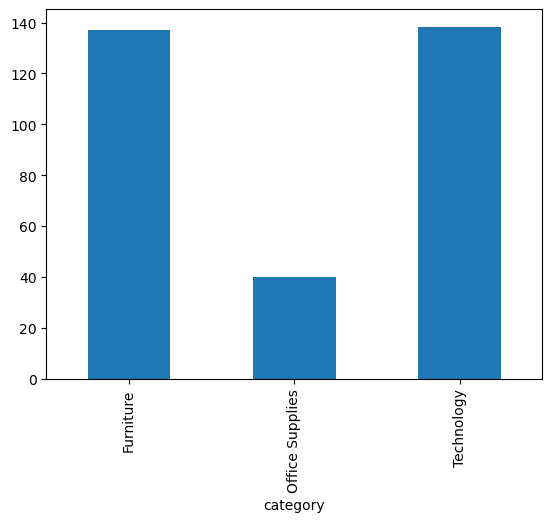

In [79]:
#visualize it
products.groupby('category')['product_cost_to_consumer'].mean().plot(kind='bar')

In [81]:
#categorize based on category and subcategory to find the highest price available
products.groupby(['category', 'sub_category'])['product_cost_to_consumer'].max()


category         sub_category
Furniture        Bookcases        440.67
                 Chairs           560.78
                 Furnishings      167.87
                 Tables           925.23
Office Supplies  Appliances       570.15
                 Art              139.13
                 Binders         1360.99
                 Envelopes        162.93
                 Fasteners         19.89
                 Labels            98.31
                 Paper            104.85
                 Storage          518.31
                 Supplies        1310.02
Technology       Accessories      421.95
                 Copiers         2099.99
                 Machines        3773.08
                 Phones           654.24
Name: product_cost_to_consumer, dtype: float64

<Axes: xlabel='category,sub_category'>

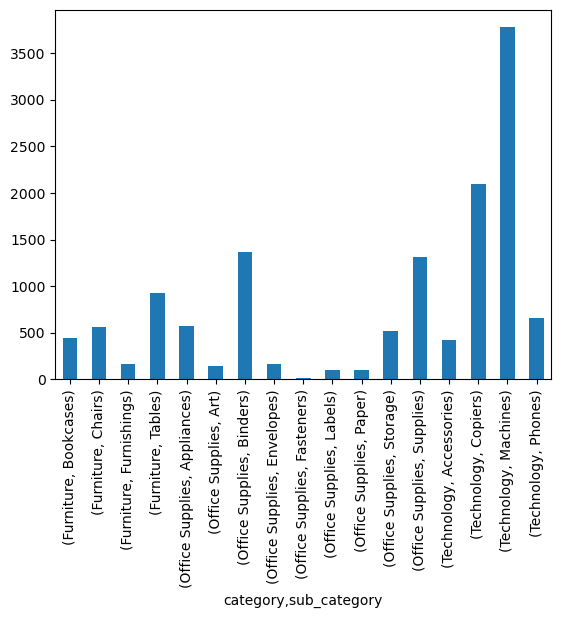

In [82]:
#visualize this
products.groupby(['category', 'sub_category'])['product_cost_to_consumer'].max().plot(kind='bar')

<Axes: xlabel='category,sub_category'>

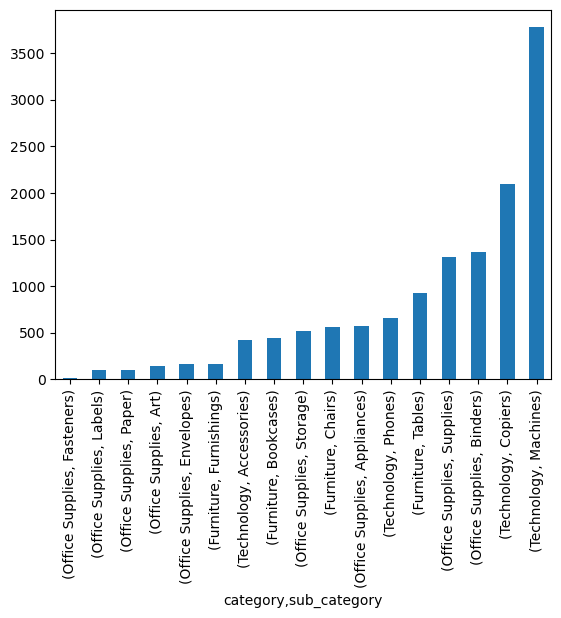

In [85]:
#sort above
products.groupby(['category', 'sub_category'])['product_cost_to_consumer'].max().sort_values().plot(kind='bar')

In [ ]:
# Chain on a sort_values command to sort in DESCENDING order


In [ ]:
# Access the index to get the product ID sorted by largest mean discount


In [ ]:
# Finally, select the first product ID in this index - this will be associated with the largest mean discount!


Finally, we can apply our group by method to the combined DataFrame we created when joining tables together. Let's use this to determine the salesperson who is generating the most profit. 

In [ ]:
# First, group the combined dataframe by salesperson and take the sum of the profit 


In [ ]:
# Sort the above output in descending order to see the salesperson with the largest profit


In [ ]:
# Access the index of the above output 


In [ ]:
# Access the first entry in the index to get the name of the salesperson generating the most profit


## Lesson Summary
---
Today, we:

- Used pandas to handle missing or problematic data values.
- Identified appropriate cleaning strategies for specific types of data.
- Used groupby() and JOIN statements to combine data with pandas.
- Created insights from data by splitting and combining data segments.
